In [1]:
from google.colab import drive
drive.mount('/drive')

#Optional: move to the desired location:
%cd /drive/My Drive/500

Mounted at /drive
/drive/My Drive/500


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd 
from imutils import paths

import imutils
from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

from skimage import feature
from skimage.feature import local_binary_pattern
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [3]:
def get_denoising(image):
    

    # resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img

In [4]:
def lbp_extraction(img):
    radius = 2
    n_points = 8 * radius
    
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return hist

In [5]:

def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [ 
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur

In [6]:
imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))

In [7]:
# data = pd.DataFrame(columns=['contrast','correlation', 'energy', 'homogeneity'])
# labels = pd.DataFrame(columns=['label'])

data_hsv = []

data_lbp =[]

data_glcm=[]

labels =[]

In [8]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    


    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/triple/hsv_lbp_glcm.csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in data_hsv:
                writer.writerow(data)
    except IOError:
        print("I/O error")
        
    
    lbp_features = get_denoising(resizing)
    
    # gray_lbp = cv2.cvtColor(lbp_features, cv2.COLOR_BGR2GRAY)
    lbp_get= lbp_extraction(lbp_features)

    
#     feature.append(label)
    data_lbp.append(lbp_get)
#     data.loc[len(data)] = feature

#     properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']






     
    glcm_features = get_denoising(resizing)
    
    # gray_glcm = cv2.cvtColor(glcm_features, cv2.COLOR_BGR2GRAY)

    data_glcm.append(glcm_features)

 
        
    label = imagePath.split(os.path.sep)[-2]

    labels.append(label)
#     labels.loc[len(labels)] = label






    if  i > 0 and i % 1 == 0:

        print("{}/{}".format(i, len(imagePaths)))
        
        
        

{'mean_h': 9.618522799744898, 'mean_s': 119.83041693239795, 'mean_v': 152.78045280612244, 'std_h': 5.615590814004203, 'std_s': 31.885444347820016, 'std_v': 42.84428226591853, 'var_h': 31.53486019032838, 'var_s': 1016.6815612579275, 'var_v': 1835.632522881701, 'skew_h': 19.96409455462799, 'skew_s': -0.3113348817120624, 'skew_v': -1.064526342377438, 'kurt_h': 573.4256327039847, 'kurt_s': 3.0218601824378277, 'kurt_v': 2.8677032949646195}
{'mean_h': 25.81118463010204, 'mean_s': 98.05980947066327, 'mean_v': 157.40160634566325, 'std_h': 51.441943396429906, 'std_s': 25.210099906037108, 'std_v': 70.00828324125486, 'var_h': 2646.2735404014984, 'var_s': 635.5491372723721, 'var_v': 4901.159722387766, 'skew_h': 2.555142733059937, 'skew_s': 0.10063651021373841, 'skew_v': -0.3320324569483176, 'kurt_h': 7.612541731514433, 'kurt_s': 3.735051922155021, 'kurt_v': 1.336093367922426}
1/225
{'mean_h': 9.62093431122449, 'mean_s': 99.4898756377551, 'mean_v': 162.6493542729592, 'std_h': 14.912566829554866, 's

In [9]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[2], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls = []
for img, label in zip(data_glcm, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")
# columns.loc[len(labels)] = label

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/triple/hsv_lbp_glcm.csv")

hsv_df.head()

mean_h      mean_s      mean_v  ...      kurt_h    kurt_s     kurt_v
0   9.618523  119.830417  152.780453  ...  573.425633  3.021860   2.867703
1  25.811185   98.059809  157.401606  ...    7.612542  3.735052   1.336093
2   9.620934   99.489876  162.649354  ...  115.710962  2.101487   3.072661
3   8.853197  101.999562  150.346919  ...  539.405946  3.355420   2.226917
4  10.885264   95.707809  179.391821  ...    2.105885  2.119462  46.143659

[5 rows x 15 columns]

In [11]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
lbp_df = pd.DataFrame(data_lbp)

#save to csv
lbp_df.to_csv("/drive/My Drive/TA/triple/lbp_glcm_hsv.csv", index=False)

lbp_df.head()

0         1         2   ...        15        16        17
0  0.066785  0.043208  0.035694  ...  0.040577  0.086276  0.373984
1  0.064931  0.038504  0.034538  ...  0.035734  0.085300  0.350207
2  0.075654  0.054110  0.035814  ...  0.051997  0.097397  0.433175
3  0.075415  0.048948  0.035276  ...  0.051897  0.097437  0.430305
4  0.078982  0.052993  0.033681  ...  0.051977  0.103177  0.436842

[5 rows x 18 columns]

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

lbp_df = pd.read_csv("/drive/My Drive/TA/triple/lbp_glcm_hsv.csv")

lbp_df.head(120)

0         1         2  ...        15        16        17
0    0.066785  0.043208  0.035694  ...  0.040577  0.086276  0.373984
1    0.064931  0.038504  0.034538  ...  0.035734  0.085300  0.350207
2    0.075654  0.054110  0.035814  ...  0.051997  0.097397  0.433175
3    0.075415  0.048948  0.035276  ...  0.051897  0.097437  0.430305
4    0.078982  0.052993  0.033681  ...  0.051977  0.103177  0.436842
..        ...       ...       ...  ...       ...       ...       ...
115  0.062799  0.040776  0.034060  ...  0.043168  0.084722  0.374382
116  0.034379  0.028181  0.025929  ...  0.026985  0.083665  0.260623
117  0.063198  0.034758  0.037169  ...  0.040159  0.086914  0.338807
118  0.060108  0.041932  0.036551  ...  0.036850  0.081294  0.339405
119  0.027423  0.017718  0.017997  ...  0.020388  0.067562  0.198900

[120 rows x 18 columns]

In [13]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("/drive/My Drive/TA/triple/glcm_lbp_hsv.csv", index=False)

glcm_df.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0    137.369993   105.650104  ...         0.189259  Melanoma
1    189.715573   151.401275  ...         0.266378  Melanoma
2     99.682412    87.796779  ...         0.181584  Melanoma
3    157.655667   137.928955  ...         0.157580  Melanoma
4     27.872285    26.952000  ...         0.241103  Melanoma
..          ...          ...  ...              ...       ...
220   60.928471    55.609624  ...         0.203665    Normal
221   42.084198    38.010678  ...         0.210116    Normal
222   55.253881    49.373484  ...         0.240200    Normal
223   21.149855    17.600314  ...         0.283320    Normal
224   29.813787    24.091516  ...         0.248373    Normal

[225 rows x 17 columns]

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glcm_df = pd.read_csv("/drive/My Drive/TA/triple/glcm_lbp_hsv.csv")
# glcm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glcm_df.head(120)

contrast_0  contrast_45  ...  homogeneity_135     label
0    137.369993   105.650104  ...         0.189259  Melanoma
1    189.715573   151.401275  ...         0.266378  Melanoma
2     99.682412    87.796779  ...         0.181584  Melanoma
3    157.655667   137.928955  ...         0.157580  Melanoma
4     27.872285    26.952000  ...         0.241103  Melanoma
..          ...          ...  ...              ...       ...
115   75.577180    64.713326  ...         0.265804       Bcc
116   13.862492     8.992540  ...         0.450242       Bcc
117  134.961913    97.977719  ...         0.229735       Bcc
118  230.300374   184.844497  ...         0.156821       Bcc
119   12.996018     8.272839  ...         0.451253       Bcc

[120 rows x 17 columns]

In [15]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/triple/hsv_lbp_glcm.csv')
df2 = pd.read_csv('/drive/My Drive/TA/triple/lbp_glcm_hsv.csv')
df3 = pd.read_csv('/drive/My Drive/TA/triple/glcm_lbp_hsv.csv')
result = pd.concat([df1, df2, df3], axis=1)
result.to_csv('/drive/My Drive/TA/triple/merged_hsv_lbp_glcm.csv', index=False)

# left_index=True, right_index=True

In [16]:
result = pd.read_csv("/drive/My Drive/TA/triple/merged_hsv_lbp_glcm.csv")



result.head(1000)

mean_h      mean_s  ...  homogeneity_135     label
0     9.618523  119.830417  ...         0.189259  Melanoma
1    25.811185   98.059809  ...         0.266378  Melanoma
2     9.620934   99.489876  ...         0.181584  Melanoma
3     8.853197  101.999562  ...         0.157580  Melanoma
4    10.885264   95.707809  ...         0.241103  Melanoma
..         ...         ...  ...              ...       ...
220  14.114059   23.215661  ...         0.203665    Normal
221  14.109315   18.560886  ...         0.210116    Normal
222  55.918208    5.526965  ...         0.240200    Normal
223  16.193379   12.476582  ...         0.283320    Normal
224  43.152324   14.178073  ...         0.248373    Normal

[225 rows x 50 columns]

In [17]:
print(result)

        mean_h      mean_s  ...  homogeneity_135     label
0     9.618523  119.830417  ...         0.189259  Melanoma
1    25.811185   98.059809  ...         0.266378  Melanoma
2     9.620934   99.489876  ...         0.181584  Melanoma
3     8.853197  101.999562  ...         0.157580  Melanoma
4    10.885264   95.707809  ...         0.241103  Melanoma
..         ...         ...  ...              ...       ...
220  14.114059   23.215661  ...         0.203665    Normal
221  14.109315   18.560886  ...         0.210116    Normal
222  55.918208    5.526965  ...         0.240200    Normal
223  16.193379   12.476582  ...         0.283320    Normal
224  43.152324   14.178073  ...         0.248373    Normal

[225 rows x 50 columns]


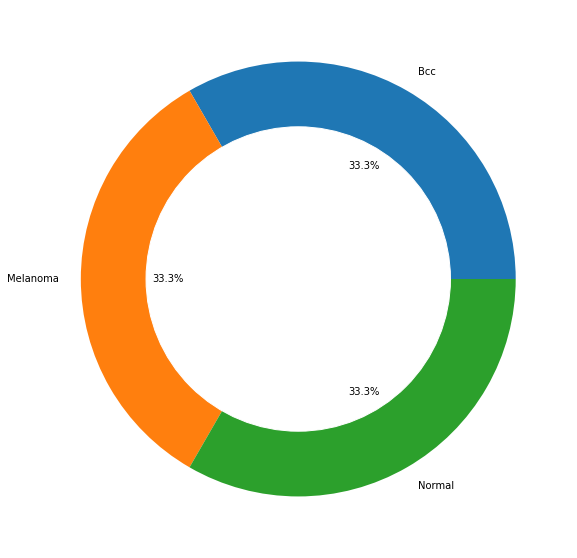

In [18]:
label_distr = result['label'].value_counts()

label_name = ['Bcc', 'Melanoma','Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
print(label_distr)

Bcc         75
Normal      75
Melanoma    75
Name: label, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(result.values)


X = decimal_scaling(
            result[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v',
                    '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                    'contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
                    'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
                    'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
                    'contrast_135', 'correlation_135', 'energy_135','homogeneity_135']].values
                    )
# '10','11','12','13','14','15','16','17',
#'18','19','20','21','22','23','24','25',

In [26]:
le = LabelEncoder()
le.fit(result["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(result['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [28]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

# import numpy as np

# def display_summary(true,pred):
#     tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
#     print('confusion matrix')
#     print(np.array([[tp,fp],[fn,tn]]))
#     print('sensitivity is %f',1.*tp/(tp+fn))
#     print('specificity is %f',1.*tn/(tn+fp))
#     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
# print('Deep Neural Network')
# display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 49) (45, 49)
Epoch 1/100
6/6 [==============================] - 1s 44ms/step - loss: 1.0935 - accuracy: 0.3944 - val_loss: 1.0797 - val_accuracy: 0.5333
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0644 - accuracy: 0.6222 - val_loss: 1.0553 - val_accuracy: 0.5111
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0228 - accuracy: 0.6389 - val_loss: 1.0062 - val_accuracy: 0.5778
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9565 - accuracy: 0.6778 - val_loss: 0.9295 - val_accuracy: 0.6889
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.8622 - accuracy: 0.7056 - val_loss: 0.8524 - val_accuracy: 0.5778
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7717 - accuracy: 0.7167 - val_loss: 0.7519 - val_accuracy: 0.7556
Epoch 7/100
6/6 [=============================

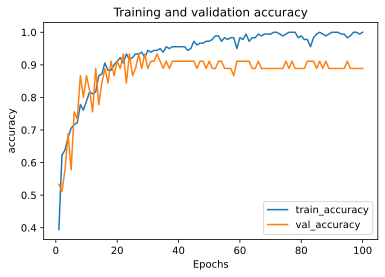

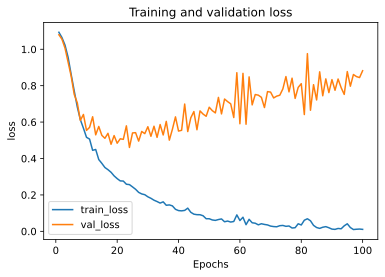

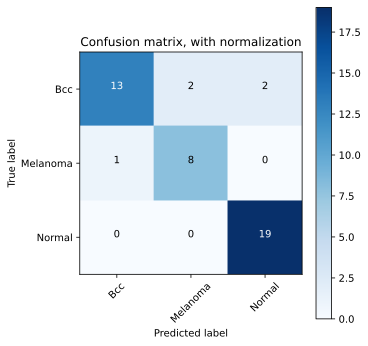

              precision    recall  f1-score   support

         Bcc       0.93      0.76      0.84        17
    Melanoma       0.80      0.89      0.84         9
      Normal       0.90      1.00      0.95        19

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[13.  8. 19.]
  [ 1.  2.  2.]]

 [[ 4.  1.  0.]
  [27. 34. 24.]]]
sensitivity is %f [0.76 0.89 1.  ]
specificity is %f [0.96 0.94 0.92]
accuracy is %f [0.89 0.93 0.96]
balanced accuracy is % [0.86 0.92 0.96]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 49) (45, 49)
Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.0929 - accuracy: 0.4056 - val_loss: 1.0856 - val_accuracy: 0.5778
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0661 - accuracy: 0.6778 - val_loss: 1.

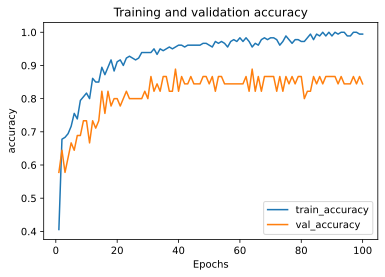

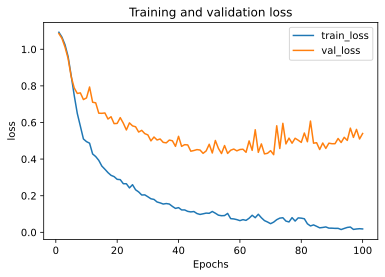

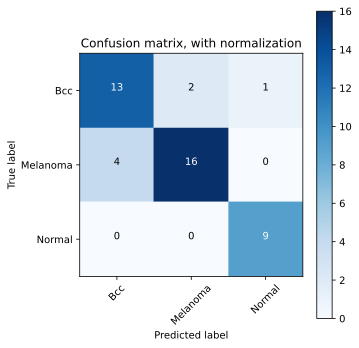

              precision    recall  f1-score   support

         Bcc       0.76      0.81      0.79        16
    Melanoma       0.89      0.80      0.84        20
      Normal       0.90      1.00      0.95         9

    accuracy                           0.84        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.85      0.84      0.84        45

Deep Neural Network
confusion matrix
[[[13. 16.  9.]
  [ 4.  2.  1.]]

 [[ 3.  4.  0.]
  [25. 23. 35.]]]
sensitivity is %f [0.81 0.8  1.  ]
specificity is %f [0.86 0.92 0.97]
accuracy is %f [0.84 0.87 0.98]
balanced accuracy is % [0.84 0.86 0.99]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 49) (45, 49)
Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 1.0938 - accuracy: 0.3333 - val_loss: 1.0787 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0677 - accuracy: 0.6222 - val_loss: 1

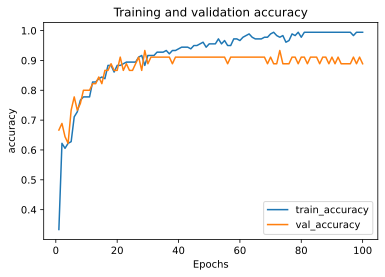

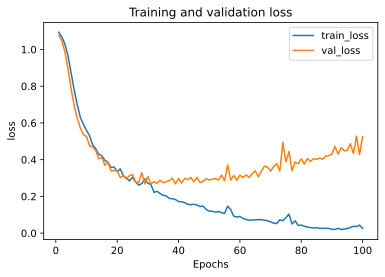

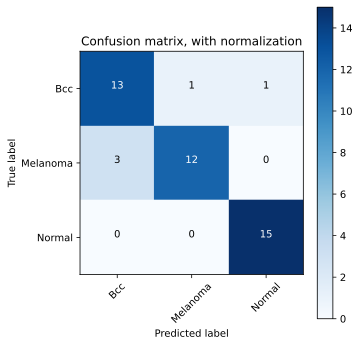

              precision    recall  f1-score   support

         Bcc       0.81      0.87      0.84        15
    Melanoma       0.92      0.80      0.86        15
      Normal       0.94      1.00      0.97        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[13. 12. 15.]
  [ 3.  1.  1.]]

 [[ 2.  3.  0.]
  [27. 29. 29.]]]
sensitivity is %f [0.87 0.8  1.  ]
specificity is %f [0.9  0.97 0.97]
accuracy is %f [0.89 0.91 0.98]
balanced accuracy is % [0.88 0.88 0.98]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 49) (45, 49)
Epoch 1/100
6/6 [==============================] - 1s 82ms/step - loss: 1.0955 - accuracy: 0.3500 - val_loss: 1.0835 - val_accuracy: 0.6222
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0741 - accuracy: 0.7056 - val_loss: 1.

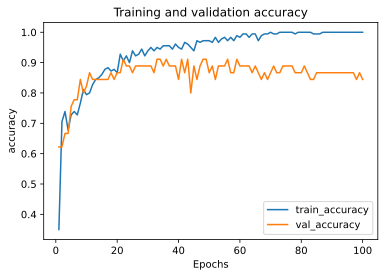

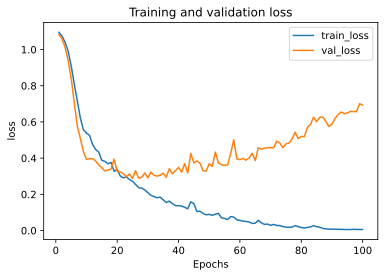

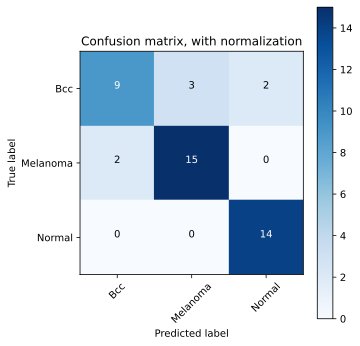

              precision    recall  f1-score   support

         Bcc       0.82      0.64      0.72        14
    Melanoma       0.83      0.88      0.86        17
      Normal       0.88      1.00      0.93        14

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

Deep Neural Network
confusion matrix
[[[ 9. 15. 14.]
  [ 2.  3.  2.]]

 [[ 5.  2.  0.]
  [29. 25. 29.]]]
sensitivity is %f [0.64 0.88 1.  ]
specificity is %f [0.94 0.89 0.94]
accuracy is %f [0.84 0.89 0.96]
balanced accuracy is % [0.79 0.89 0.97]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 49) (45, 49)
Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.0944 - accuracy: 0.2889 - val_loss: 1.0789 - val_accuracy: 0.6889
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0674 - accuracy: 0.7778 - val_loss: 1.

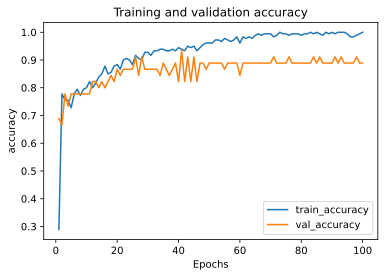

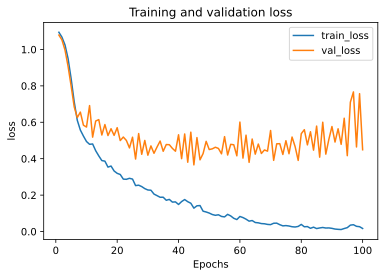

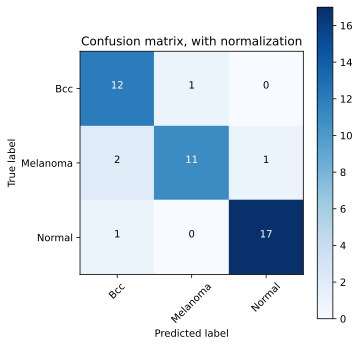

              precision    recall  f1-score   support

         Bcc       0.80      0.92      0.86        13
    Melanoma       0.92      0.79      0.85        14
      Normal       0.94      0.94      0.94        18

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[12. 11. 17.]
  [ 3.  1.  1.]]

 [[ 1.  3.  1.]
  [29. 30. 26.]]]
sensitivity is %f [0.92 0.79 0.94]
specificity is %f [0.91 0.97 0.96]
accuracy is %f [0.91 0.91 0.96]
balanced accuracy is % [0.91 0.88 0.95]




Rata-Rata Akurasi
87.11% (+/- 2.18%)


In [29]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(49, input_dim=49, activation='relu'))

  model.add(Dense(128, activation='relu'))

  

  model.add(Dense(128, activation='relu'))

  model.add(Dense(128, activation='relu'))



  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma', 'Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma', 'Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




# save_model_path = "/drive/My Drive/Moddel/model_new2.h5"
# model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [30]:
cvscores

[88.88888955116272,
 84.44444537162781,
 88.88888955116272,
 84.44444537162781,
 88.88888955116272]